# Fase 4: Modeling

## Aprendizaje No Supervisado - Clustering

El Aprendizaje No Supervisado es una rama del aprendizaje automático que se enfoca en descubrir patrones ocultos en los datos sin la necesidad de etiquetas o respuestas predefinidas. Dentro de este enfoque, el Clustering es una técnica fundamental que agrupa datos en conjuntos según su similitud. Este método permite identificar estructuras subyacentes en grandes volúmenes de información, clasificando elementos que comparten características comunes.








Importamos el dataset ya listo para usar

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
ds_clas = pd.read_csv('../data/data_lista.csv')
ds_clas.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,RainToday,RISK_MM,RainTomorrow,Location_le,Risk_MM_cat_le,Rainfall_cat_le,Estacion_le,WindGustDir_le,WindDir9am_le,WindDir3pm_le
0,0.516509,0.523629,0.001617,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,...,0.0,0.000000,0.0,0.041667,1.0,1.0,1.0,0.8125,0.8125,0.8750
1,0.375000,0.565217,0.000000,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,...,0.0,0.000000,0.0,0.041667,1.0,1.0,1.0,0.8750,0.3750,0.9375
2,0.504717,0.576560,0.000000,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,...,0.0,0.000000,0.0,0.041667,1.0,1.0,1.0,0.9375,0.8125,0.9375
3,0.417453,0.620038,0.000000,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,...,0.0,0.002695,0.0,0.041667,1.0,1.0,1.0,0.2500,0.5625,0.0000
4,0.613208,0.701323,0.002695,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,...,0.0,0.000539,0.0,0.041667,1.0,1.0,1.0,0.8125,0.0625,0.4375


In [10]:
# Random state
rs = 123

In [12]:
ds_clas.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RISK_MM', 'RainTomorrow', 'Location_le', 'Risk_MM_cat_le',
       'Rainfall_cat_le', 'Estacion_le', 'WindGustDir_le', 'WindDir9am_le',
       'WindDir3pm_le'],
      dtype='object')

Para llevar a cabo el proceso de clustering, es fundamental seleccionar cuidadosamente las variables que representen de manera significativa el comportamiento de los datos. En este caso, se han definido las siguientes columnas para utilizarlas como base del análisis de agrupamiento.

Estas variables corresponden a mediciones meteorológicas clave tomadas a las 9 de la mañana y a las 3 de la tarde, lo que permite capturar tanto las condiciones atmosféricas matutinas como las de la tarde.

Al usar estas variables para el clustering, se busca agrupar las observaciones en función de similitudes en sus condiciones meteorológicas. Esto podría permitir, por ejemplo, identificar distintos tipos de días típicos (secos, húmedos, calurosos, templados, etc.)

In [17]:
columnas = ['Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [19]:
ds_cluster = ds_clas[columnas]

In [21]:
ds_cluster.head()

,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.71,0.22,0.449587,0.4800,0.508439,0.522073
1,0.44,0.25,0.497521,0.4912,0.514768,0.570058
2,0.38,0.30,0.447934,0.5056,0.594937,0.548944
3,0.45,0.16,0.613223,0.5712,0.533755,0.612284
4,0.82,0.33,0.500826,0.4624,0.527426,0.673704


<Axes: >

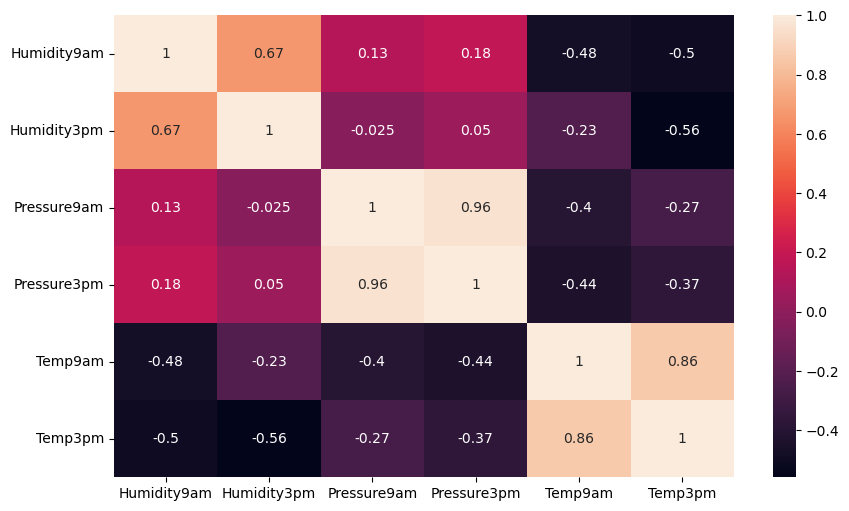

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(ds_cluster.corr(), annot=True)

### Método de Elbow y Silhouette

Seleccionamos una muestra representativa equivalente al 20% del total de los datos con el propósito de aplicar el método del codo. Esta técnica nos permite determinar el valor óptimo de k, identificando el punto en el que agregar más grupos no aporta una mejora significativa.

Además, evaluamos la calidad de la segmentación mediante el silhouette score, asegurándonos de que la distribución de los clusters sea adecuada y maximice la separación entre ellos. Así, optimizamos la configuración del modelo para obtener grupos bien definidos y con la mejor coherencia posible.

In [27]:
sample_size = int(ds_cluster.shape[0] * 0.2)
sample_size

28438

In [29]:
sample = ds_cluster.sample(sample_size, random_state=rs)

Definimos un rango de k que va desde 2 clusters hasta 20 clusters

In [32]:
rango_k = range(2, 21)

Aplicamos Kmeans por cada valor de k y almacenamos la inercia obtenida y el valor de Silhouette

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Encontrar el mejor número de clusters con Elbow Method
inertias = []
results =[]

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=rs, n_init=10)
    clusters = kmeans.fit_predict(sample)
    inertia = kmeans.inertia_
    inertias.append(inertia)
    print("For n_clusters =", k,  "\nThe inertia is :", inertia)
    silhouette_avg = silhouette_score(sample, clusters)
    print("For n_clusters =", k,  "\nThe average silhouette_score is :", silhouette_avg)
    results.append([k, silhouette_avg, inertia])

For n_clusters = 2 
The inertia is : 2558.04474132849
For n_clusters = 2 
The average silhouette_score is : 0.29756976410495706
For n_clusters = 3 
The inertia is : 2115.2943155564653
For n_clusters = 3 
The average silhouette_score is : 0.24542658719201277
For n_clusters = 4 
The inertia is : 1758.3763489711807
For n_clusters = 4 
The average silhouette_score is : 0.2406337616999679
For n_clusters = 5 
The inertia is : 1553.3383608860584
For n_clusters = 5 
The average silhouette_score is : 0.22636260979622552
For n_clusters = 6 
The inertia is : 1442.3014232200303
For n_clusters = 6 
The average silhouette_score is : 0.20311140655080764
For n_clusters = 7 
The inertia is : 1345.2673020068412
For n_clusters = 7 
The average silhouette_score is : 0.2037563330799875
For n_clusters = 8 
The inertia is : 1257.171002118647
For n_clusters = 8 
The average silhouette_score is : 0.20079293185183025
For n_clusters = 9 
The inertia is : 1189.4074429525292
For n_clusters = 9 
The average silhoue

In [37]:
result = pd.DataFrame(results, columns=["n_clusters","silhouette_score", "inertia"])
result

,n_clusters,silhouette_score,inertia
0,2,0.297570,2558.044741
1,3,0.245427,2115.294316
2,4,0.240634,1758.376349
3,5,0.226363,1553.338361
4,6,0.203111,1442.301423
5,7,0.203756,1345.267302
6,8,0.200793,1257.171002
7,9,0.196265,1189.407443
8,10,0.197849,1124.154772
9,11,0.195792,1070.060304


Graficamos la inercia obtenida para cada valor de k

Podemos observar en el gráfico que despues de un k=5 la disminución de la inercia es más paulatina.

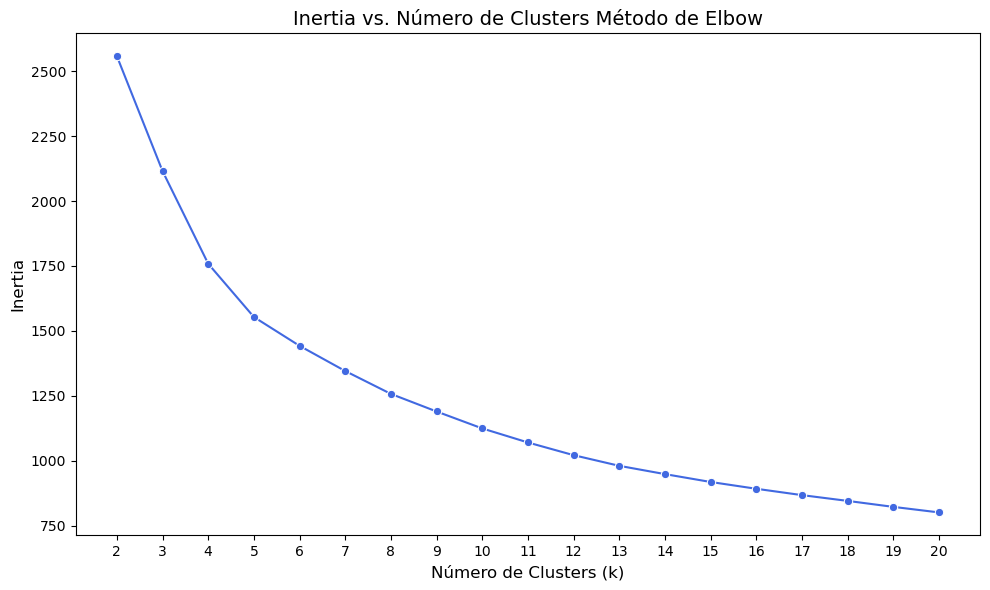

In [40]:
# Crear gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=result, x="n_clusters", y="inertia", marker="o", color="royalblue")

# Títulos y ejes
plt.title("Inertia vs. Número de Clusters Método de Elbow", fontsize=14)
plt.xlabel("Número de Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.xticks(result["n_clusters"])
plt.tight_layout()
plt.show()

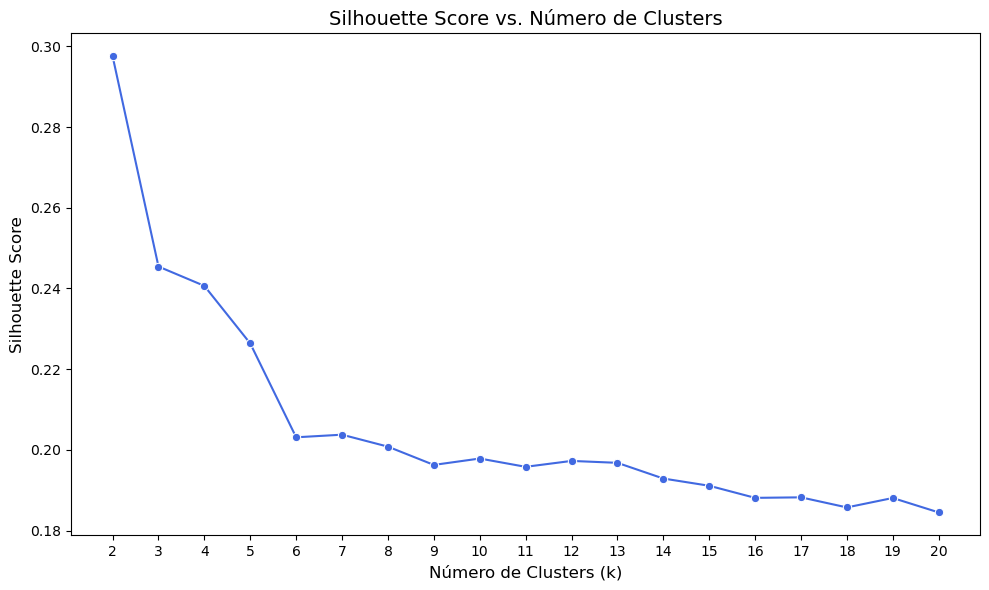

In [42]:
# Crear gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=result, x="n_clusters", y="silhouette_score", marker="o", color="royalblue")

# Títulos y ejes
plt.title("Silhouette Score vs. Número de Clusters", fontsize=14)
plt.xlabel("Número de Clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks(result["n_clusters"])
plt.tight_layout()
plt.show()

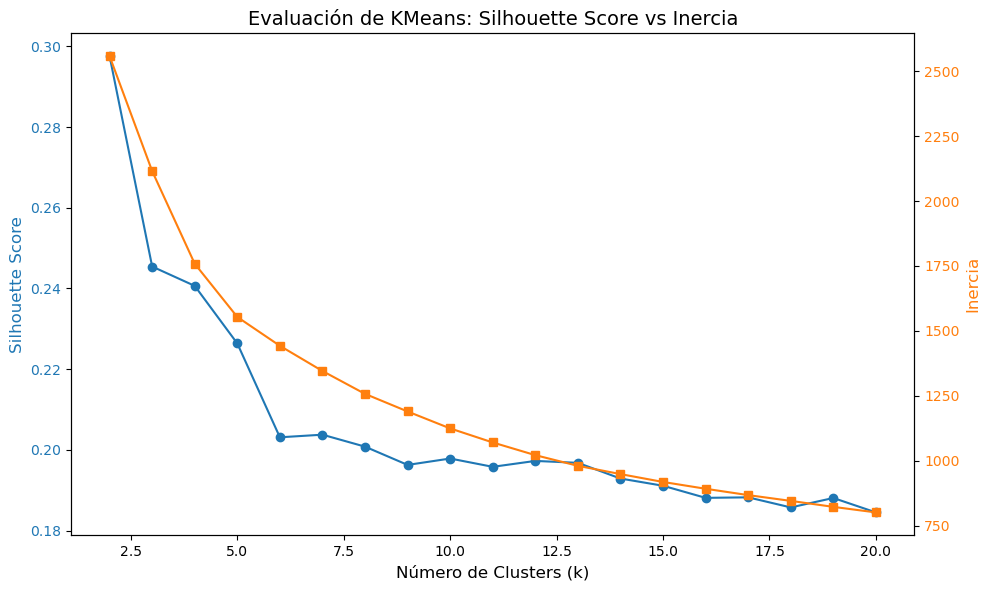

In [44]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Eje primario: Silhouette Score
color1 = 'tab:blue'
ax1.set_xlabel("Número de Clusters (k)", fontsize=12)
ax1.set_ylabel("Silhouette Score", color=color1, fontsize=12)
ax1.plot(result["n_clusters"], result["silhouette_score"], color=color1, marker='o', label='Silhouette Score')
ax1.tick_params(axis='y', labelcolor=color1)

# Eje secundario: Inercia
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel("Inercia", color=color2, fontsize=12)
ax2.plot(result["n_clusters"], result["inertia"], color=color2, marker='s', label='Inercia')
ax2.tick_params(axis='y', labelcolor=color2)

# Título y ajustes
plt.title("Evaluación de KMeans: Silhouette Score vs Inercia", fontsize=14)
fig.tight_layout()
plt.show()

**Análisis del Silhouette Score**

El Silhouette Score mide qué tan similares son los puntos dentro de un cluster comparado con otros clusters. Su valor va de -1 a 1, y cuanto más alto, mejor.

- En este caso, el valor más alto se obtiene con 2 clusters (0.28), y disminuye progresivamente a medida que se incrementa el número de clusters. Este comportamiento sugiere que con solo 2 grupos los datos están bien separados, mientras que añadir más clusters genera solapamientos o fronteras menos claras entre ellos.

**Análisis de la Inertia**

La inertia mide la suma de distancias cuadradas de cada punto al centro de su cluster. Cuanto más baja, mejor (menor dispersión interna).

- A medida que aumenta n_clusters, la inercia disminuye, lo que es esperado porque con más clusters, los puntos están más cerca del centroide.

- Sin embargo, la reducción de la inercia es significativa entre 2 y 5 clusters, pero a partir de ahí la ganancia marginal es cada vez menor.

**Conclusión y Recomendación**

- Si se prioriza la separación clara entre grupos, el valor de 2 clusters es el más indicado, ya que maximiza el Silhouette Score. No obstante, esta segmentación puede ser demasiado general.

- Considerando también la compacidad (inercia) y el equilibrio entre ambos indicadores, una configuración de 4 o 5 clusters parece más adecuada. En estos casos, el Silhouette Score sigue siendo aceptable (~0.18-0.22) y la inercia muestra una mejora considerable respecto a k = 2 o 3.

### Uso de PCA

El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica de reducción de dimensionalidad utilizada en el procesamiento de datos y el aprendizaje automático. Su objetivo es transformar un conjunto de variables posiblemente correlacionadas en un nuevo grupo de variables llamadas componentes principales, que son ortogonales entre sí y capturan la mayor cantidad de variabilidad posible en los datos. Al reducir la cantidad de dimensiones, PCA facilita la visualización, el análisis y el entrenamiento de modelos, eliminando redundancias y destacando las características más relevantes.








Usaremos PCA para reducir a 3 componentes principales de nuestro dataset.

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_pca = pca.fit_transform(ds_cluster)

In [57]:
X_pca

array([[-0.2048648 , -0.00708793, -0.19408137],
       [-0.35961232,  0.01673928, -0.18369298],
       [-0.3827897 , -0.05182848, -0.17431505],
       ...,
       [-0.23527184,  0.27812345, -0.0410322 ],
       [-0.26360772,  0.2044394 , -0.04831406],
       [-0.29431091,  0.16482595, -0.04129561]])

El atributo pca.explained_variance_ratio_ proporciona información clave sobre el grado de varianza capturado por cada componente principal en el modelo PCA.

El primer componente principal explica aproximadamente 54.26% de la varianza total en los datos, el segundo 23.98% y el tercero 11.16%. Estos valores reflejan qué tan significativa es cada dimensión en la representación reducida de los datos.

In [51]:
pca.explained_variance_ratio_

array([0.5713211 , 0.22682656, 0.1010178 ])

Los loadings representan la relación entre las variables originales y los nuevos componentes principales, indicando cuánto influye cada variable en cada componente.

In [54]:
# Crear un DataFrame con los "loadings"
loadings = pd.DataFrame(
    pca.components_.T,  # transponer para que filas sean variables, columnas componentes
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=ds_cluster.columns  # nombres de las variables originales
)

loadings.round(3)  # Redondeamos para facilitar lectura

,PC1,PC2,PC3
Humidity9am,0.591,-0.092,0.185
Humidity3pm,0.632,-0.463,0.181
Pressure9am,0.089,0.495,0.515
Pressure3pm,0.114,0.469,0.456
Temp9am,-0.304,-0.486,0.500
Temp3pm,-0.371,-0.274,0.457


In [61]:
# Mostrar top 3 variables por componente
for i in range(pca.n_components_):
    print(f"\nTop variables en PC{i+1}:")
    print(loadings.iloc[:, i].abs().sort_values(ascending=False).head(3))


Top variables en PC1:
Humidity3pm    0.631986
Humidity9am    0.590802
Temp3pm        0.371312
Name: PC1, dtype: float64

Top variables en PC2:
Pressure9am    0.495344
Temp9am        0.485626
Pressure3pm    0.469215
Name: PC2, dtype: float64

Top variables en PC3:
Pressure9am    0.515429
Temp9am        0.499876
Temp3pm        0.457472
Name: PC3, dtype: float64


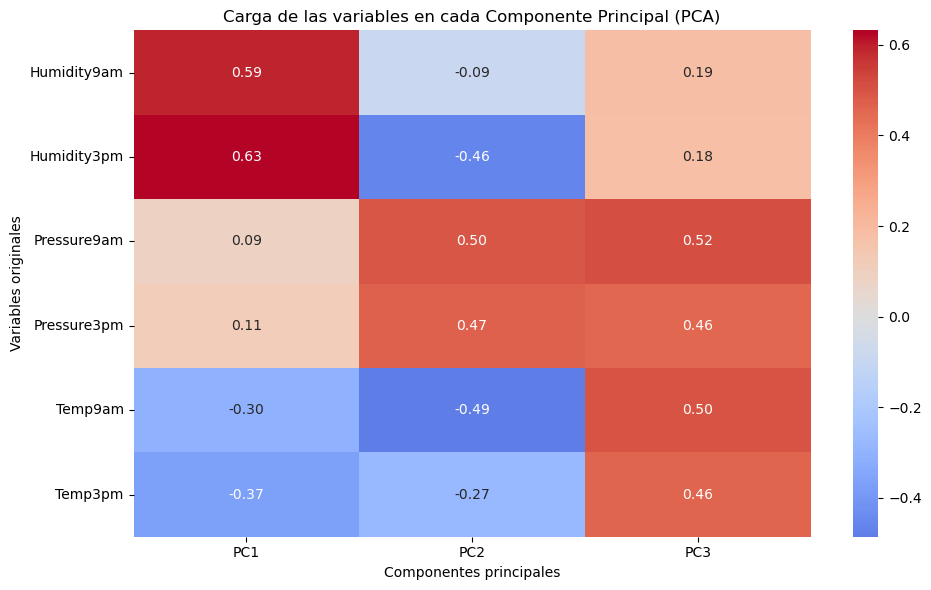

In [63]:
# Visualización con heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, fmt=".2f")

plt.title("Carga de las variables en cada Componente Principal (PCA)")
plt.ylabel("Variables originales")
plt.xlabel("Componentes principales")
plt.tight_layout()
plt.show()

A continuación vemos la suma acumulada de la varianza explicada por los componentes principales. En este caso, el resultado es de 0.8940891 indica que los primeros tres componentes explican aproximadamente 89.41% de la variabilidad total de los datos.

Esto significa que, al usar solo los tres primeros componentes en lugar de todas las dimensiones originales, se conserva una parte significativa de la información, permitiendo una reducción de dimensionalidad eficiente sin perder demasiada representatividad en los datos.

In [66]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.5713211  0.79814766 0.89916546]


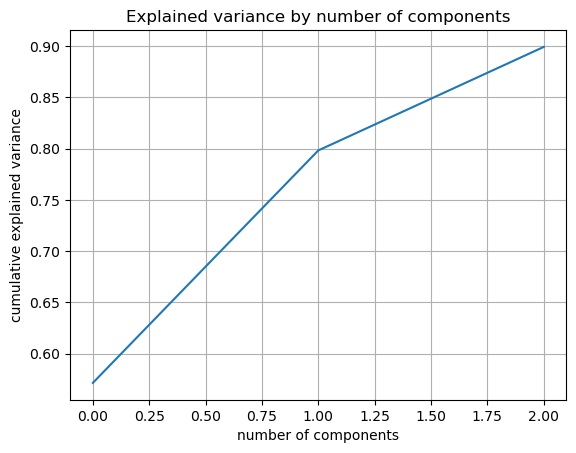

In [68]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained variance by number of components')
plt.grid(True)
plt.show()

### Kmeans + PCA

Después de reducir la dimensionalidad del conjunto de datos utilizando Análisis de Componentes Principales (PCA), aplicaremos el algoritmo de KMeans sobre esta nueva representación simplificada. Esta etapa tiene como objetivo agrupar las observaciones en clusters con características similares, pero ahora en un espacio transformado donde las variables están decorrelacionadas y ordenadas por importancia.

El uso de PCA antes de KMeans presenta varias ventajas:

1. Reducción de ruido y redundancia: PCA elimina la multicolinealidad entre variables originales, facilitando la formación de grupos más definidos.

2. Mejor visualización: Al proyectar los datos en 2 o 3 componentes principales, es posible visualizar los clusters de forma clara y comprensible.

3. Mayor eficiencia: Trabajar con menos dimensiones acelera los cálculos de KMeans y mejora su rendimiento en términos computacionales.

En resumen, al aplicar KMeans sobre los datos transformados por PCA, buscamos identificar patrones de comportamiento meteorológico de forma más robusta y visualmente interpretable, manteniendo al mismo tiempo la mayor cantidad posible de información relevante del conjunto original.

Definimos un k igual a 5

In [74]:
k=5

In [76]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=k, random_state=rs, n_init=10)

labels = kmeans_pca.fit_predict(X_pca)

In [78]:
labels

array([0, 2, 2, ..., 0, 0, 0])

In [94]:
# Crea un DataFrame con los cuatro primeros componentes y etiquetas
df_pca_kmeans = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
df_pca_kmeans['Cluster'] = labels

In [96]:
df_pca_kmeans

,PC1,PC2,PC3,Cluster
0,-0.204865,-0.007088,-0.194081,0
1,-0.359612,0.016739,-0.183693,2
2,-0.382790,-0.051828,-0.174315,2
3,-0.412573,0.131568,-0.073207,2
4,-0.129889,-0.101947,-0.056553,1
...,...,...,...,...
142185,-0.138726,0.307460,-0.046488,0
142186,-0.221931,0.306116,-0.053599,0
142187,-0.235272,0.278123,-0.041032,0
142188,-0.263608,0.204439,-0.048314,0


Sacamos una muestra de 1000 registros para poder graficar la clusterizacion obtenida

In [99]:
df_pca_kmeans_sample = df_pca_kmeans.sample(1000, random_state=rs)

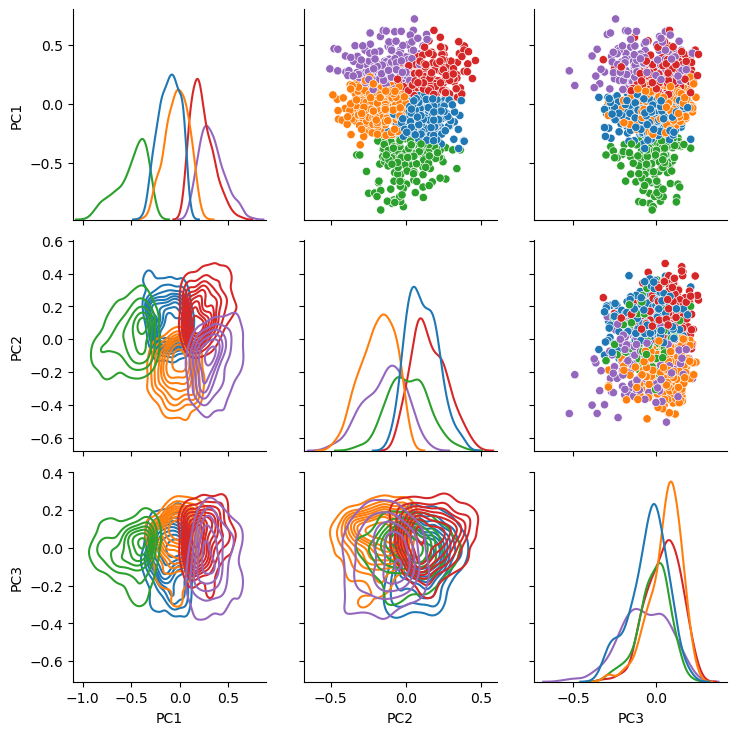

In [166]:
g = sns.PairGrid(df_pca_kmeans_sample, hue='Cluster', palette='tab10')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot)

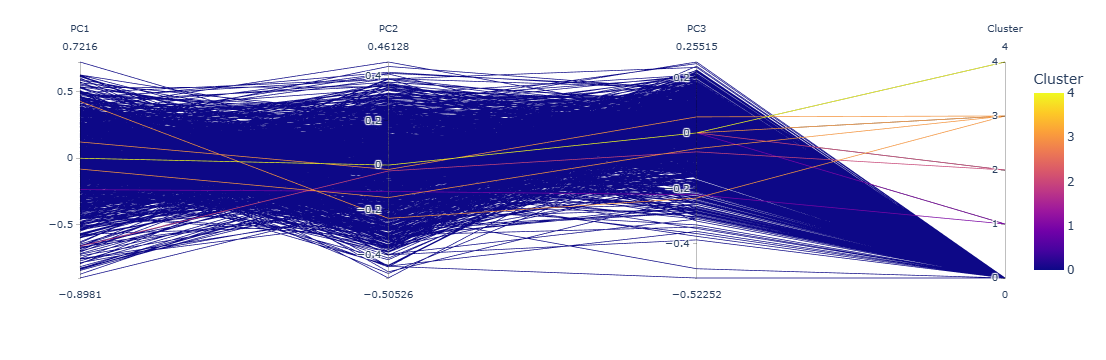

In [170]:
import plotly.express as px

px.parallel_coordinates(df_pca_kmeans_sample, color='Cluster')

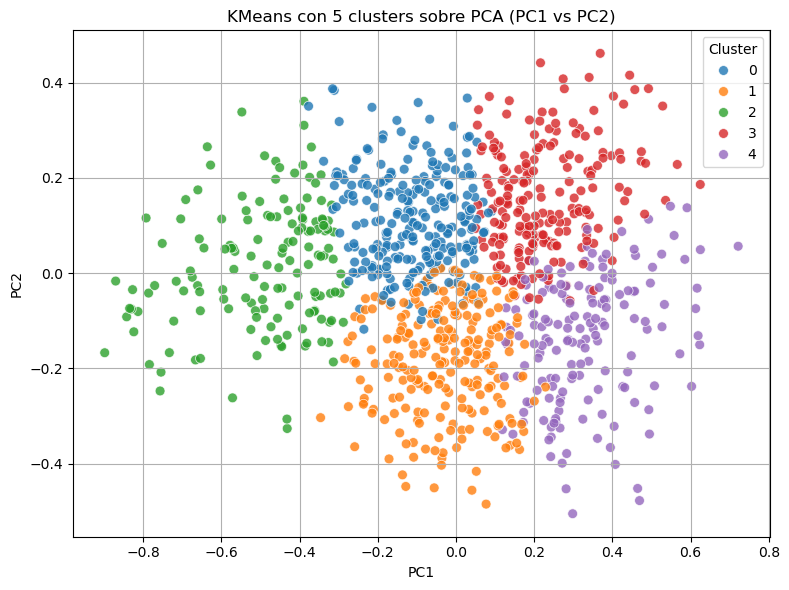

In [101]:
# Visualiza los clusters en PC1 vs PC2
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_pca_kmeans_sample,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='tab10',
    alpha=0.8,
    s=50
)
plt.title(f"KMeans con {k} clusters sobre PCA (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

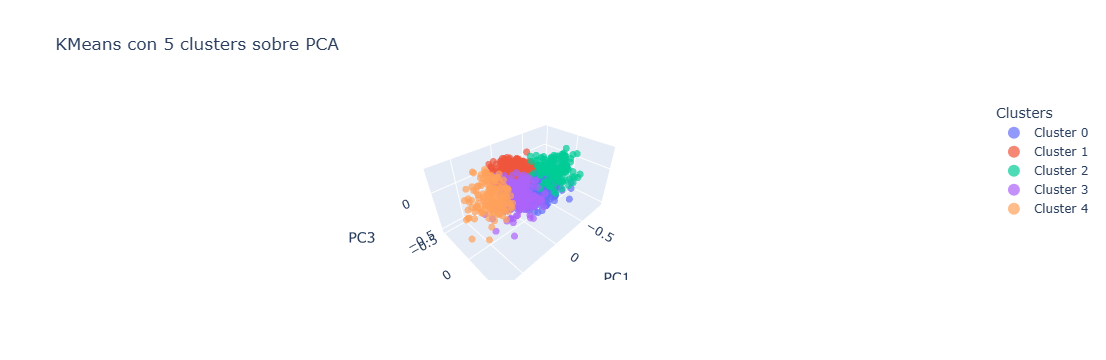

In [103]:
import plotly.graph_objects as go
import pandas as pd

# Crear figura
fig = go.Figure()

# Agregar un scatter3d por cada cluster (leyenda separada por color)
for cluster_id in sorted(df_pca_kmeans_sample['Cluster'].unique()):
    cluster_data = df_pca_kmeans_sample[df_pca_kmeans_sample['Cluster'] == cluster_id]

    fig.add_trace(go.Scatter3d(
        x=cluster_data['PC1'],
        y=cluster_data['PC2'],
        z=cluster_data['PC3'],
        mode='markers',
        marker=dict(
            size=4,
            opacity=0.7
        ),
        name=f'Cluster {cluster_id}'
    ))


# Layout
fig.update_layout(
    title=f"KMeans con {k} clusters sobre PCA",
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    legend=dict(
        title='Clusters',
        itemsizing='constant'
    )
)

fig.show()


In [105]:
# Crear una copia del dataset original con la columna Cluster añadida
ds_cluster_clustered = ds_cluster.copy()
ds_cluster_clustered['Cluster'] = df_pca_kmeans['Cluster'].values

# Verificar
ds_cluster_clustered.head()

,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Cluster
0,0.71,0.22,0.449587,0.4800,0.508439,0.522073,0
1,0.44,0.25,0.497521,0.4912,0.514768,0.570058,2
2,0.38,0.30,0.447934,0.5056,0.594937,0.548944,2
3,0.45,0.16,0.613223,0.5712,0.533755,0.612284,2
4,0.82,0.33,0.500826,0.4624,0.527426,0.673704,1


In [156]:
g_sample = ds_cluster_clustered.sample(100, random_state=rs)

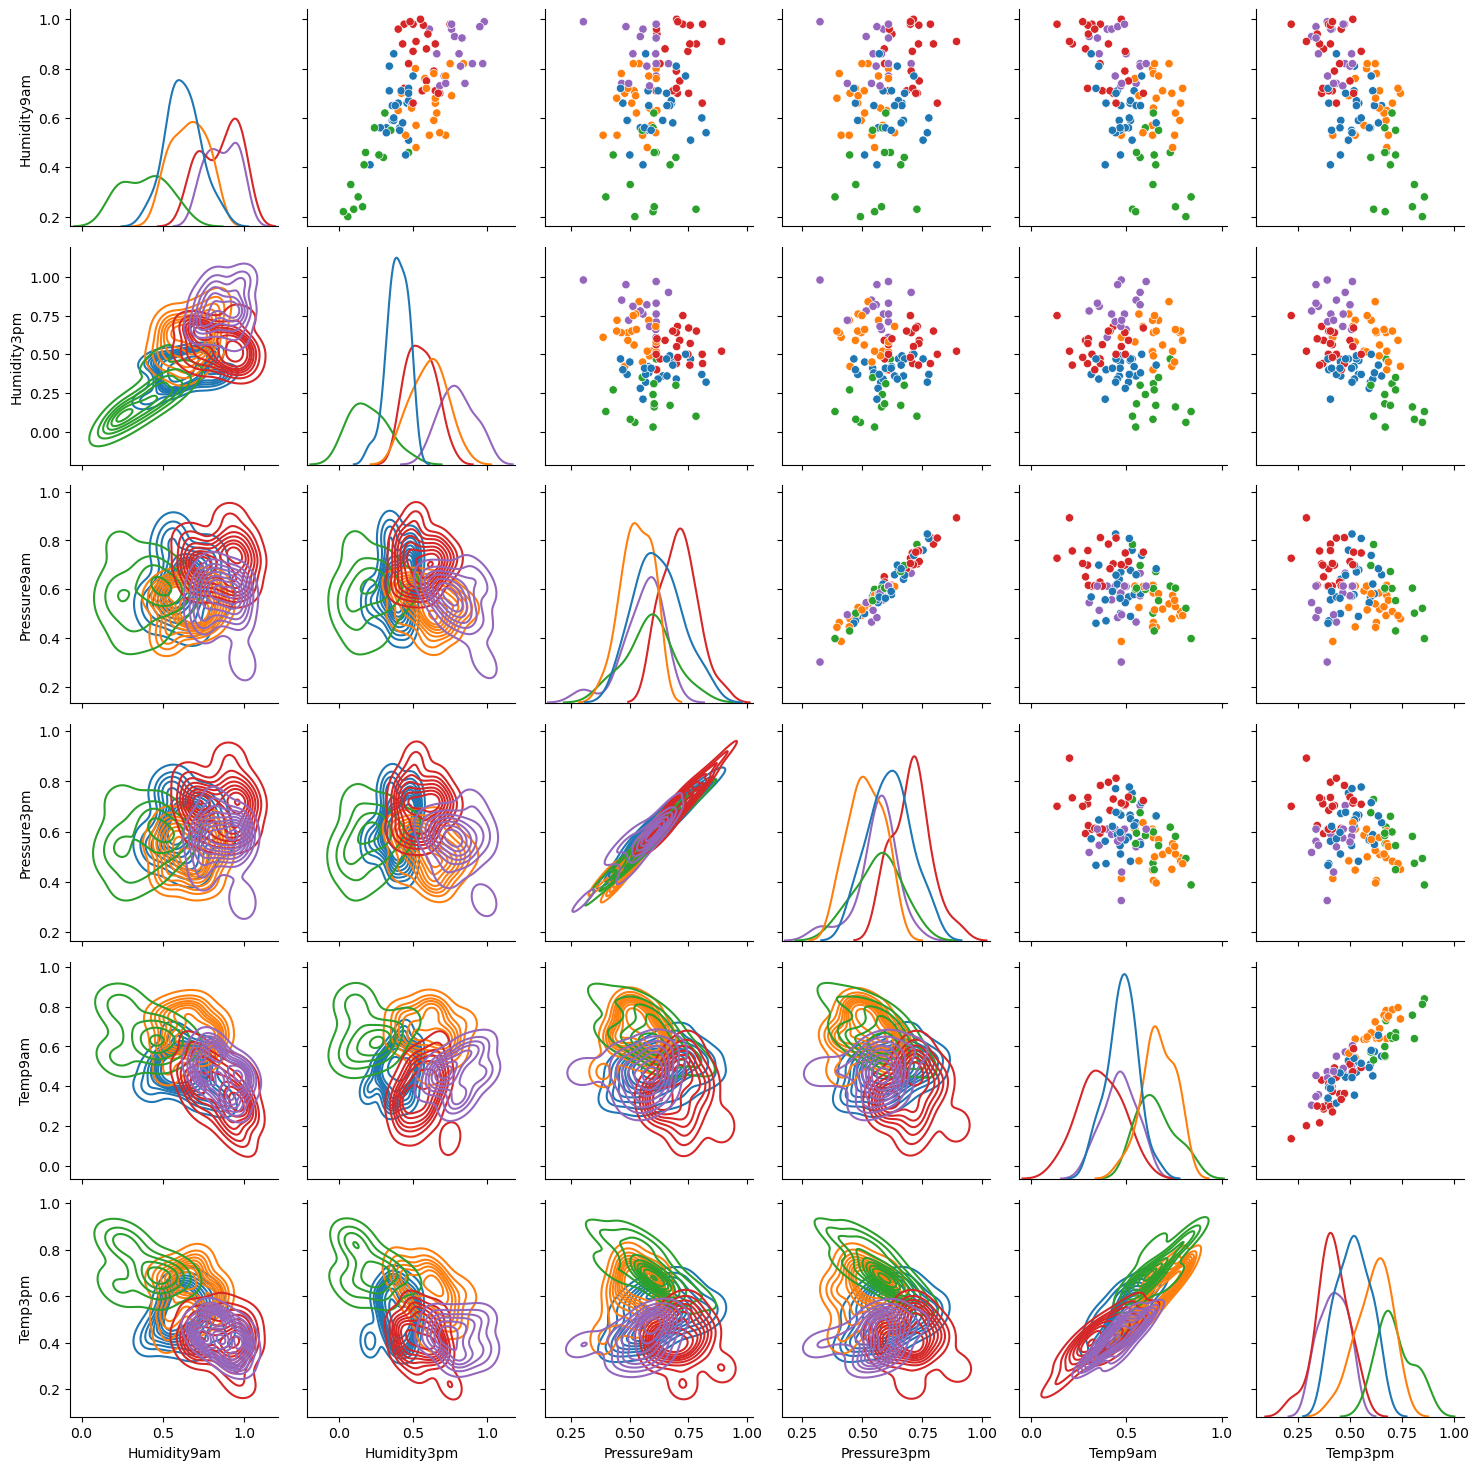

In [158]:
g = sns.PairGrid(g_sample, hue='Cluster', palette='tab10')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot)

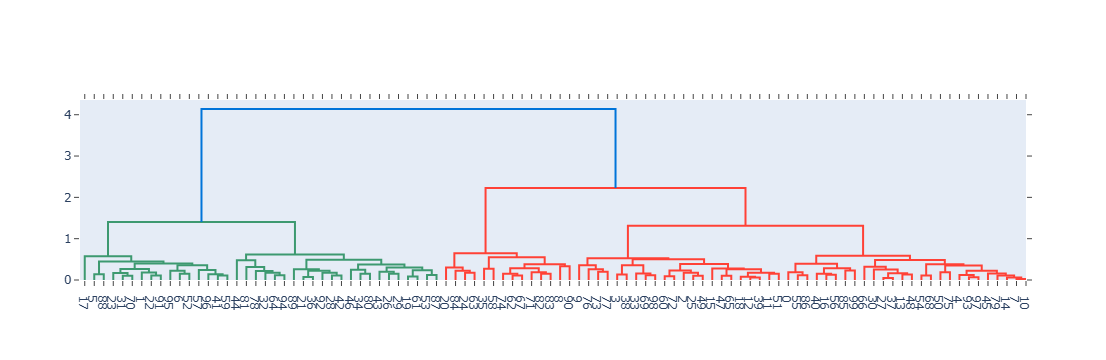

In [162]:
import plotly.figure_factory as ff

ff.create_dendrogram(g_sample)

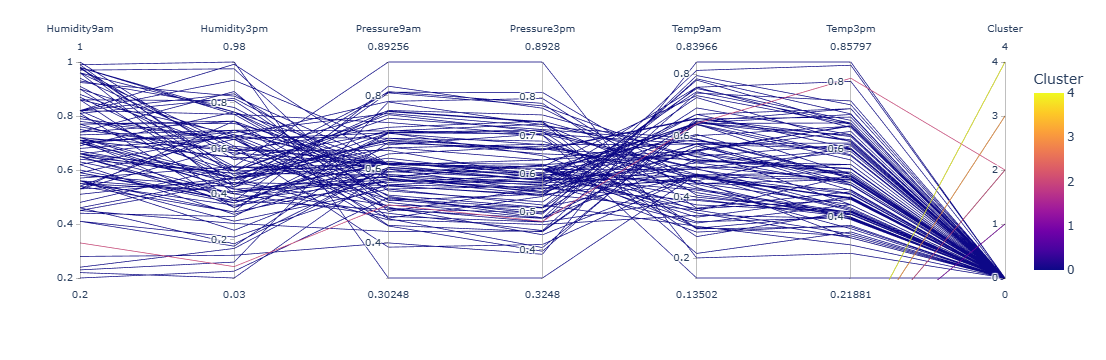

In [160]:
import plotly.express as px

px.parallel_coordinates(g_sample, color='Cluster')

Registros agrupados por cada cluster

In [107]:
ds_cluster_clustered['Cluster'].value_counts()

Cluster
0    36401
1    31602
3    29726
4    23582
2    20879
Name: count, dtype: int64

Desnormalizamos los datos para poder analizar los cluster y sus caracteristicas

In [111]:
grouped = ds_cluster_clustered.groupby('Cluster').mean().round(2)

In [113]:
df_esc = pd.read_csv('../data/weatherAUS.csv')
df_esc = df_esc[columnas]

In [115]:
min_original = df_esc.min()
max_original = df_esc.max()

In [117]:
# Aplicamos transformación inversa de minmaxscaler
grouped_desnormalizado = grouped.copy()
for col in grouped.columns:
    grouped_desnormalizado[col] = grouped[col] * (max_original[col] - min_original[col]) + min_original[col]

Visualizamos los promedios de cada columna por cada cluster y procedemos a analizar y generar una descripción de cada uno de ellos.

In [120]:
# Visualizamos la tabla agrupada por cluster con el promedio por cada columna
grouped_desnormalizado = grouped_desnormalizado.round(2)
grouped_desnormalizado

,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
Cluster,,,,,,
0,61.0,39.0,1019.22,1016.47,15.08,21.17
1,70.0,59.0,1013.78,1011.47,23.14,25.86
2,41.0,22.0,1014.38,1011.47,23.61,31.07
3,83.0,59.0,1024.66,1022.72,10.81,15.96
4,87.0,78.0,1013.78,1012.10,13.66,15.96


### Prefiles de Clusters K-Means + PCA

Cluster 0:

Cálido y húmedo

- Humedad: 70% AM, 59% PM (moderadamente alta)

- Presión: Baja (≈1013 hPa)

- Temperatura: Alta (23°C AM, 26°C PM)

Representa días calurosos con humedad considerable, típicos de climas subtropicales.

---
Cluster 1:

Muy caluroso y seco

- Humedad: Muy baja (42% AM, 22% PM)

- Presión: Baja (≈1011 hPa)

- Temperatura: Muy alta (23°C AM, 31°C PM)

Este es el grupo más extremo en términos de calor y sequedad. Representa condiciones similares a las de olas de calor o zonas áridas en verano.

---
Cluster 2:

Frío y muy húmedo

- Humedad: Muy alta (87% AM, 72% PM)

- Presión: Media (≈1014 hPa)

- Temperatura: Muy baja (13°C AM, 15.7°C PM)

Días fríos y saturados de humedad, posiblemente asociados a lluvias persistentes, niebla o cielos muy cubiertos. Común en invierno u otoño húmedo.

---
Cluster 3:

Frío y estable

- Humedad: Alta (82% AM, 59% PM)

- Presión: Muy alta (≈1026–1024 hPa)

- Temperatura: Baja (11°C AM, 16°C PM)

Corresponde a días fríos pero estables, dominados por sistemas de alta presión. Podrían ser días despejados, secos y con aire frío, típicos de invierno.

---

Cluster 4:

Templado y seco

- Humedad: Moderada-baja (63% AM, 40% PM)

- Presión: Alta (≈1019–1017 hPa)

- Temperatura: Moderada (15°C AM, 21°C PM)

Días agradables y secos, probablemente comunes en primavera u otoño. Condiciones confortables con buen tiempo.



In [123]:
ds_clas['Cluster'] = df_pca_kmeans['Cluster'].values
ds_clas

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,RISK_MM,RainTomorrow,Location_le,Risk_MM_cat_le,Rainfall_cat_le,Estacion_le,WindGustDir_le,WindDir9am_le,WindDir3pm_le,Cluster
0,0.516509,0.523629,0.001617,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,...,0.000000,0.0,0.041667,1.0,1.0,1.0,0.8125,0.8125,0.8750,0
1,0.375000,0.565217,0.000000,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,...,0.000000,0.0,0.041667,1.0,1.0,1.0,0.8750,0.3750,0.9375,2
2,0.504717,0.576560,0.000000,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,...,0.000000,0.0,0.041667,1.0,1.0,1.0,0.9375,0.8125,0.9375,2
3,0.417453,0.620038,0.000000,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,...,0.002695,0.0,0.041667,1.0,1.0,1.0,0.2500,0.5625,0.0000,2
4,0.613208,0.701323,0.002695,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,...,0.000539,0.0,0.041667,1.0,1.0,1.0,0.8125,0.0625,0.4375,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142185,0.283019,0.502836,0.000000,0.193798,0.115385,0.149425,0.59,0.27,0.730579,0.7056,...,0.000000,0.0,0.854167,1.0,1.0,0.0,0.0000,0.1250,0.0000,0
142186,0.266509,0.533081,0.000000,0.193798,0.100000,0.126437,0.51,0.24,0.728926,0.6912,...,0.000000,0.0,0.854167,1.0,1.0,0.0,0.0000,0.5625,0.0625,0
142187,0.285377,0.568998,0.000000,0.124031,0.100000,0.103448,0.56,0.21,0.710744,0.6720,...,0.000000,0.0,0.854167,1.0,1.0,0.0,0.3750,0.5625,0.1875,0
142188,0.327830,0.599244,0.000000,0.240310,0.069231,0.103448,0.53,0.24,0.669421,0.6352,...,0.000000,0.0,0.854167,1.0,1.0,0.0,0.1875,0.5625,0.8750,0


In [125]:
ds_clas.to_csv('../data/data_clusterizado.csv', index=False)